Pick one dataset from either the City_of_Ann_Arbor/Water_Quality folder or the
US_Geological_Survey folder. Produce 2 plots that help you explore your chosen dataset. These
plots should be distinct (i.e., they should relate to different variables or relationships in the data).
For each plot, explain why you were interested to produce that visualization, why you presented
the data in the chosen format, and describe what you found. Make sure to clearly distinguish your
explorations and visualizations into two separate parts in the Jupyter notebook.


In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

## Exploration 1: Malletts Creek Gage Height Over Time


What is gage height? 

According to USGS, "Gage height is the distance (or height) of the stream (or lake) water surface above the gage datum (reference point)...The gage datum is a uniquely selected reference point for each gage site. Most of the time, it is picked to be below the lowest anticipated depth of a stream or lake because streambeds change over time."

For more information visit https://waterdata.usgs.gov/blog/gage_height/

In [2]:
# Load Mallets Creek Gage Height data
gage_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1xF0skrpLizGfT_7XnHgk5-iAhcYMVnIOq5q5OBhjTh4/gviz/tq?tqx=out:csv')
gage_data

,Agency Code,Site Number,Date Time,Time Coed,Gage Height,Qualification Code
0,USGS,4174518,1/1/2020 0:00,EST,3.80,A
1,USGS,4174518,1/1/2020 0:15,EST,3.79,A
2,USGS,4174518,1/1/2020 0:30,EST,3.79,A
3,USGS,4174518,1/1/2020 0:45,EST,3.78,A
4,USGS,4174518,1/1/2020 1:00,EST,3.78,A
...,...,...,...,...,...,...
128079,USGS,4174518,9/5/2023 15:15,EST,3.15,P
128080,USGS,4174518,9/5/2023 15:30,EST,3.15,P
128081,USGS,4174518,9/5/2023 15:45,EST,3.15,P
128082,USGS,4174518,9/5/2023 16:00,EST,3.15,P


We can see that the data is recorded in 15 minute increments from January 1, 2020 to September 5, 2023.

In [3]:
# View data types of the gage height data
gage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128084 entries, 0 to 128083
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agency Code         128084 non-null  object 
 1   Site Number         128084 non-null  int64  
 2   Date Time           128084 non-null  object 
 3   Time Coed           128084 non-null  object 
 4   Gage Height         128084 non-null  float64
 5   Qualification Code  128084 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.9+ MB


In [4]:
# Change Date Time to a datetime object
gage_data['Date Time'] = pd.to_datetime(gage_data['Date Time'])

The Qualifications code have three different variables: A, e, and P. These codes represent the reliability of the data. 
- A: Approved for publication. Processing and review completed.
- e: Value has been estimated
- P: Provisional data subject to revision

In [5]:
# Check the quantities of observations for each qualification code
gage_data['Qualification Code'].value_counts()

A    120767
P      7317
Name: Qualification Code, dtype: int64

Here, we can see that there are no records of the 'e' code present in the data. This means the data has either been approved or is subject to revision. For this analysis, we want to observe the approved data because we do not want to account for potentially unreliable/poor quality data.

In [6]:
# Drop the gage data of with the Qualification Code 'P'
gage_data = gage_data.drop(gage_data[gage_data['Qualification Code'] == 'P'].index)
gage_data['Qualification Code'].value_counts()

A    120767
Name: Qualification Code, dtype: int64

Now, lets view the overall distributions of the data's gage height without the qualification codes P.

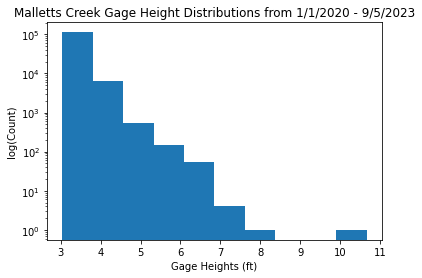

In [7]:
# Log the scale to have a better display of the data's distributions
plt.hist(gage_data['Gage Height'], log = True)

# Name the title and axes to describe the histogram
plt.title('Malletts Creek Gage Height Distributions from 1/1/2020 - 9/5/2023')
plt.xlabel('Gage Heights (ft)')
plt.ylabel('log(Count)')

plt.show()

The gage heights seem to mostly be between the 3-4 ft range. The histograms right skew shows that there are less records as the gage heights get larger.

There is an outlier visible in the histogram, lets see what that is. 

In [8]:
# See the maximum gage height record
f"{gage_data['Gage Height'].max()} ft"

'10.66 ft'

Now, lets view the gage heights between 1/1/2020 - 9/5/2023.

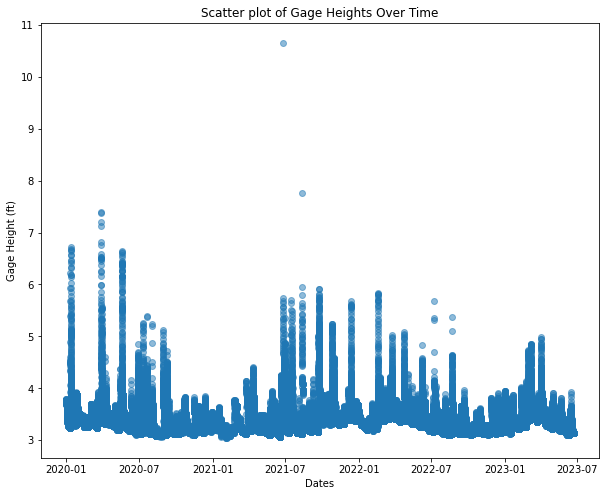

In [9]:
# Plot the gage heights on a scatter plot to view the records across time
plt.figure(figsize=(10, 8))

# Use alpha = 0.5 to add granularity
plt.scatter(gage_data['Date Time'], gage_data['Gage Height'], alpha = 0.5)

# Name the title and axes of the scatter plot
plt.title('Scatter plot of Gage Heights Over Time')
plt.xlabel('Dates')
plt.ylabel('Gage Height (ft)')

plt.show()

Since there are only three years in the dataset, lets see how the years differ in gage height recordances. This will give us a view to compare the years.

First we should make a new column in the data frame for the months:

In [10]:
# Create datetime Year column from Date Time column
gage_data['Year'] = gage_data['Date Time'].dt.year

Now we need to find the average of gage height for the years:

In [11]:
# Group and aggregate the data to find the average gage height for each year
gage_height_by_year = gage_data.groupby('Year').aggregate(
    avg_height = ('Gage Height', pd.DataFrame.mean))
gage_height_by_year

,avg_height
Year,
2020,3.368640
2021,3.381845
2022,3.355969
2023,3.417219


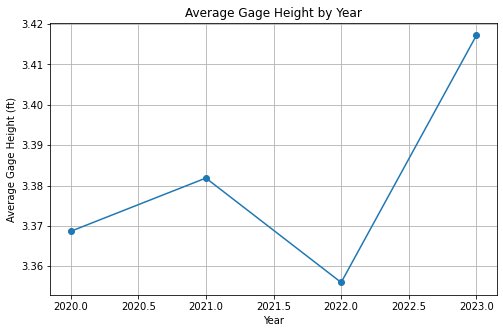

In [12]:
# Create plot of average gage heights over the years
plt.figure(figsize=(8, 5))
plt.plot(gage_height_by_year.index, gage_height_by_year['avg_height'], marker='o')

# Name title and axes to describe plot 
plt.xlabel('Year')
plt.ylabel('Average Gage Height (ft)')
plt.title('Average Gage Height by Year')

plt.grid(True)
plt.show()

In [13]:
# Find the difference between 2022 and 2023.
(round((gage_height_by_year.loc[2023]['avg_height'] - gage_height_by_year.loc[2022]['avg_height']), 2))

0.06

The largest difference is between 2022 and 2023. Althought it looks large, remember that this is only a  0.06 change in feet.

Maybe the variety of heights occurs more during each year. We should explore the months of the years. Like before: 
- Make a year column from datetime
- Group and aggregate the data to find the monthly averages of gage height

In [14]:
# Create datetime Month column from Date Time column
gage_data['Month'] = gage_data['Date Time'].dt.month

In [15]:
# Group and aggregate the data to find the average gage height for each month
gage_height_by_month = gage_data.groupby('Month').aggregate(
    avg_height = ('Gage Height', pd.DataFrame.mean))

Now, lets view the monthly gage height averages:

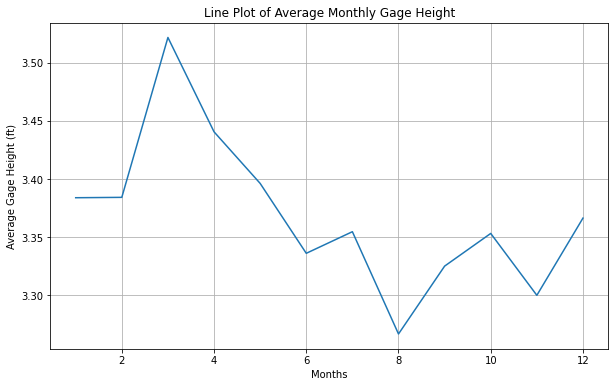

In [16]:
# Plot the monthly averages of gage height

plt.figure(figsize=(10, 6))
plt.plot(gage_height_by_month.index, gage_height_by_month)

# Name the title and axes to describe the line plot
plt.title('Line Plot of Average Monthly Gage Height')
plt.xlabel('Months')
plt.ylabel('Average Gage Height (ft)')

plt.grid(True)
plt.show()

### Explanation

From the Malletts Creek Gage Heights data, I wanted to explore how the gage height changes over time. First, I had to view the data and do some changes. I changed the 'Date Time' column to a datetime type so I was able to plot and manipulate it to create other columns like 'Month' and 'Year'. Next, I noticed that the dataset had difference ranges of quality based on a code. I filtered out the poorer quality records, symbolzed as 'P', to ensure that the data I was working with was solid information. 

Looking at the data, I made a histogram and scatter plot to look at the general distributions of the data. I noticed that most of the gage heights were in the area of 3-4 feet, but there were many stretches into the 5-6 feet range and a few outliers too. The outliers could be caused by a range of possibilites such as enviornmental or climate changes both caused by natural or human action. This would cause a deeper dive into specific USGS records, but for now I wanted to see the general trend of gage heights across time. 

So, I made more plots by grouping and aggregating the data to find the averages over the year and the months. The yearly averages were pretty consistent with one another. On the other hand, I thought the monthly averages were quite interesting. Based on the graph above, there is a clear spike of over 3.5 average feet on the third month, March. There also was a very low dip below 3.3 average feet in the eigth month, August. These observations can possibly indicate some seasonality trend for how gage height changes over time. A spike in March can infer the transition from winter to spring. During this time, temperature starts to rise along with wearther including snow or rain in Ann Arbor, MI. Melting of ice and wet weather could be the cause of a higher gage height. In August, this is typically a hotter month within summer. A hot climate could cause a lower gage height from a higher occurence of human interaction and evaporation. A higher temperature will naturally evaporate the water. I noticed that there were residential homes nearby parts of the creek on an external research of Malletts Park (https://www.a2gov.org/departments/Parks-Recreation/parks-places/pages/mallettscreek.aspx). Therefore, people may visit the creek for recreational activites which could potentially cause changes in the water like its gage height. 

## Exploration 2: Malletts Creek Gage Height in Relation to Creek Discharge 

* Note: Dr. Green has allowed me to use a second data set to merge and analyze the relationship between gage height and discharge.

What is discharge?

According to USGS, "Discharge is the volume of water moving down a stream or river per unit of time, commonly expressed in cubic feet per second or gallons per day. In general, river discharge is computed by multiplying the area of water in a channel cross section by the average velocity of the water in that cross section: discharge = area x velocity."

For more information visit https://www.usgs.gov/special-topics/water-science-school/science/how-streamflow-measured#overview

In [17]:
# Load Mallets Creek Discharge Data data
discharge_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1CzycNXvSgYab4ujYoulzbfY0oPha7yOHLocmwCGNpgM/gviz/tq?tqx=out:csv')
discharge_data

,Agency Code,Site Number,Date Time,Time Code,Discharge,Qualification Code
0,USGS,4174518,1/1/2020 0:00,EST,30.80,A
1,USGS,4174518,1/1/2020 0:15,EST,30.00,A
2,USGS,4174518,1/1/2020 0:30,EST,30.00,A
3,USGS,4174518,1/1/2020 0:45,EST,29.20,A
4,USGS,4174518,1/1/2020 1:00,EST,29.20,A
...,...,...,...,...,...,...
127689,USGS,4174518,9/5/2023 15:15,EST,2.74,P
127690,USGS,4174518,9/5/2023 15:30,EST,2.74,P
127691,USGS,4174518,9/5/2023 15:45,EST,2.74,P
127692,USGS,4174518,9/5/2023 16:00,EST,2.74,P


We can see that the data is recorded in 15 minute increments from January 1, 2020 to September 5, 2023.

In [18]:
# View data types of the creek data
discharge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127694 entries, 0 to 127693
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agency Code         127694 non-null  object 
 1   Site Number         127694 non-null  int64  
 2   Date Time           127694 non-null  object 
 3   Time Code           127694 non-null  object 
 4   Discharge           127694 non-null  float64
 5   Qualification Code  127694 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ MB


In [19]:
# Change Date Time to a datetime object
discharge_data['Date Time'] = pd.to_datetime(discharge_data['Date Time'])

The Qualifications code have three different variables: A, e, and P. These codes represent the reliability of the data. 
- A: Approved for publication. Processing and review completed.
- e: Value has been estimated
- P: Provisional data subject to revision

In [20]:
# Check the quantities of observations for each qualification code
discharge_data['Qualification Code'].value_counts()

A      119641
P        7317
A:e       736
Name: Qualification Code, dtype: int64

Here, we can see that there records of the 'A', 'A:e', and 'P' code present in the data. This means the data has either been approved, only estimated, or subject for revision. Like exploration 1, in this analysis we want to observe the approved data because we do not want to account for potentially unreliable/poor quality data.

In [21]:
# Drop the rows of with the Qualification Code 'P' and 'A:e'
discharge_data = discharge_data.drop(discharge_data[discharge_data['Qualification Code'] == 'P'].index)
discharge_data = discharge_data.drop(discharge_data[discharge_data['Qualification Code'] == 'A:e'].index)

# Check the values and their counts
discharge_data['Qualification Code'].value_counts()

A    119641
Name: Qualification Code, dtype: int64

Before analyzing the relationship between height gage and discharge, lets look into the Malletts Creek Discharge data separately.

First, lets look into the overall disrtibutions of the discharge data. 

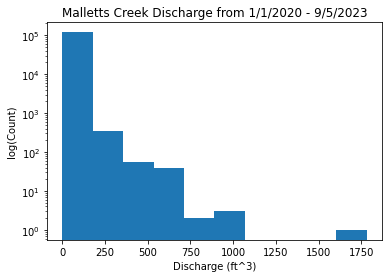

In [22]:
# Log the scale to have a better display of the data's distributions
plt.hist(discharge_data['Discharge'], log = True)

# Name the title and axes to describe the histogram
plt.title('Malletts Creek Discharge from 1/1/2020 - 9/5/2023')
plt.xlabel('Discharge (ft^3)')
plt.ylabel('log(Count)')

plt.show()

The discharge seems to mostly be between the 0-250 cubic feet range. The histograms general right skew shows there are less records of large amounts of discharge.

There is a visible outlier in the data. Lets look into the outlier's information.

In [23]:
# See the maximum discharge record for outlier
f"{discharge_data['Discharge'].max()} cubic ft"

'1780.0 cubic ft'

Since we have the general distrubutions, lets look view the discharge records from 1/1/2020-9/5/2023 in a scatter plot:

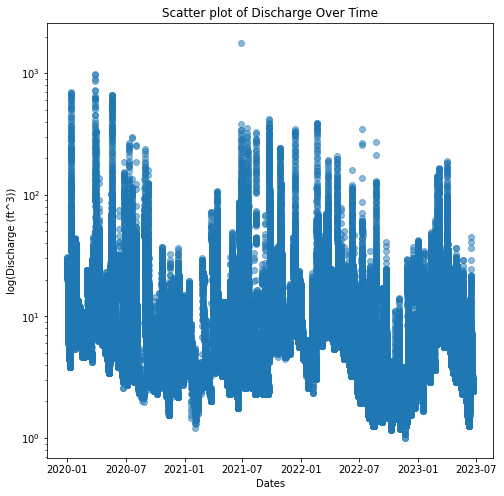

In [24]:
# Plot the discharge on a scatter plot to view the records across time
plt.figure(figsize=(8, 8))

# Use alpha = 0.5 to add granularity
plt.scatter(discharge_data['Date Time'], discharge_data['Discharge'], alpha = 0.5)

# Name the title and axes of the scatter plot
plt.title('Scatter plot of Discharge Over Time')
plt.xlabel('Dates')
plt.ylabel('log(Discharge (ft^3))')

# Log the y-scale of the plot to better visualize where points fall
plt.yscale('log')

plt.show()

I logged the y-scale of this plot to better see where the points fall and to better differentiate the y-values since they are organized by 250 increments in the histogram.
The scatter plot shows that a majority of the data falls around the 10 mark (10^1) because of the dense area.

To check this, we will compare it to the overall average of the data: 

In [25]:
f"The average of the data set is: {discharge_data['Discharge'].mean()} cubic feet."

'The average of the data set is: 10.921579558846883 cubic feet.'

This seems accuracte since the average of the data set is close to the point where a majority of the data fall in the scatter plot.

Since there is so much data, lets look at how the discharge differs year to year on average.


First, we need to make a Year column to sort the data.

In [26]:
# Make 'Year' column from 'Date Time'
discharge_data['Year'] = discharge_data['Date Time'].dt.year

Now we need to see the average discharge for each year. We can accomplish this by grouping and aggregating the data.

In [27]:
# Group and aggregate the data to find the average gage height for each year
discharge_by_year = discharge_data.groupby('Year').aggregate(
    avg_discharge = ('Discharge', pd.DataFrame.mean))
discharge_by_year

,avg_discharge
Year,
2020,12.811814
2021,11.958744
2022,8.219457
2023,10.522262


These values are not as similar to each other as the gage height, lets plot them for a closer look.

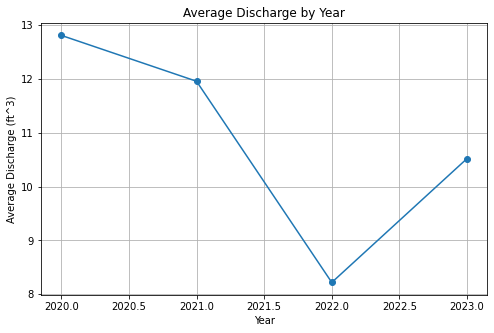

In [28]:
# Create plot of average discharges over the years
plt.figure(figsize=(8, 5))
plt.plot(discharge_by_year.index, discharge_by_year['avg_discharge'], marker='o')

# Name title and axes to describe plot 
plt.xlabel('Year')
plt.ylabel('Average Discharge (ft^3)')
plt.title('Average Discharge by Year')

plt.grid(True)
plt.show()

This is very interesting. The comparable gage height has the same low dip in 2022, but the earlier years of the average discharge have a more negative trend whereas the average gage height plot's earlier years have a more positive trend.

Even though there are some noticeable differences between the years, lets look at the monthly averages for discharges too.

Lets start by making a Month column:

In [29]:
# Make 'Month' column from 'Date Time'
discharge_data['Month'] = discharge_data['Date Time'].dt.month

Now we find the discharge averages of each month. We can do this by grouping and aggregating the data.

In [30]:
# Group and aggregate the data to find the average discharge for each month
discharge_by_month = discharge_data.groupby('Month').aggregate(
    avg_discharge = ('Discharge', pd.DataFrame.mean))
discharge_by_month

,avg_discharge
Month,
1,10.845542
2,10.876997
3,17.449804
4,11.893970
5,12.146586
6,10.820657
7,11.225527
8,7.859438
9,10.495594


Upon a first look, I see there is a much larger value in the third month. Maybe this corresponds with our third month spike in the monthly average gage heights plot from earlier. Lets plot the data for a good look.

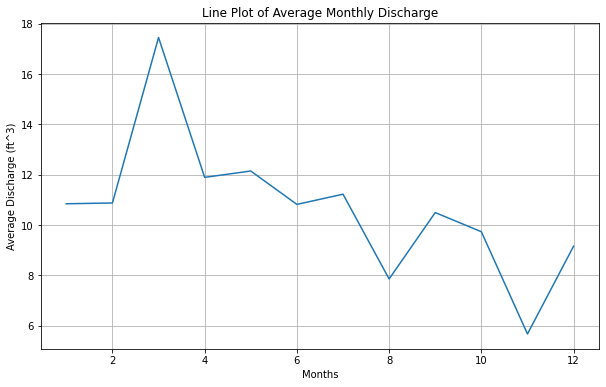

In [31]:
# Plot the monthly averages of discharge
plt.figure(figsize=(10, 6))
plt.plot(discharge_by_month.index, discharge_by_month)

# Name the title and axes to describe the line plot
plt.title('Line Plot of Average Monthly Discharge')
plt.xlabel('Months')
plt.ylabel('Average Discharge (ft^3)')

plt.grid(True)
plt.show()

The spike of the third month is clearly the highest value like we saw before in the monthly averages of gage height. There also seems to ba a low dip in the 11th month. 

Now that we see a commonality between the gage heights and discharges, we should look further into their relationship. First we will do this by merging both of the datasets.

In [32]:
# Inner merge the databases to disregard the records with null values in 'Discharge' and 'Gage Height'
merged_df = pd.merge(gage_data, discharge_data, how = 'inner')

Now, we will group and aggregate the data to find the monthly averages of gage height and discharge.

In [33]:
merged_monthly_avgs = merged_df.groupby('Month').agg({'Gage Height': 'mean', 'Discharge': 'mean'})
merged_monthly_avgs

,Gage Height,Discharge
Month,,
1,3.384946,10.736501
2,3.400137,10.876997
3,3.521917,17.449804
4,3.440589,11.893970
5,3.396244,12.146586
6,3.335705,10.820657
7,3.354215,11.225527
8,3.264710,7.859438
9,3.325133,10.495594


With the aggregated data, it is time to plot them. For this relationship we will use a scatter plot.

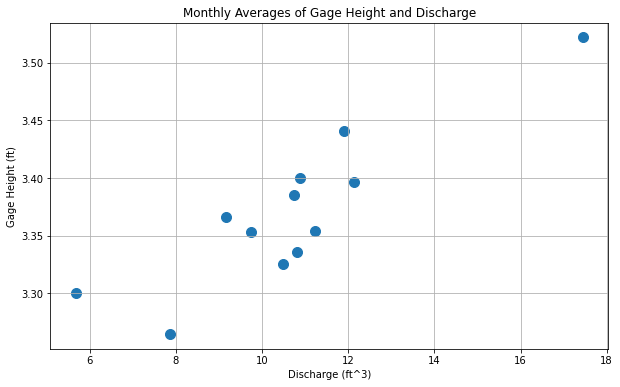

In [34]:
# Create scatter plot
plt.figure(figsize=[10,6])
plt.scatter(merged_monthly_avgs['Discharge'], merged_monthly_avgs['Gage Height'], s = 100)

# Name the title and axes to describe the plot
plt.title('Monthly Averages of Gage Height and Discharge')
plt.xlabel('Discharge (ft^3)')
plt.ylabel('Gage Height (ft)')

plt.grid(True)
plt.show()

It is clear the scatter plot gas a general positive trend. 

I will also provide a scatter plot of the merged data's height gage and discharge to view the overall relationship trend for every record in the data set.

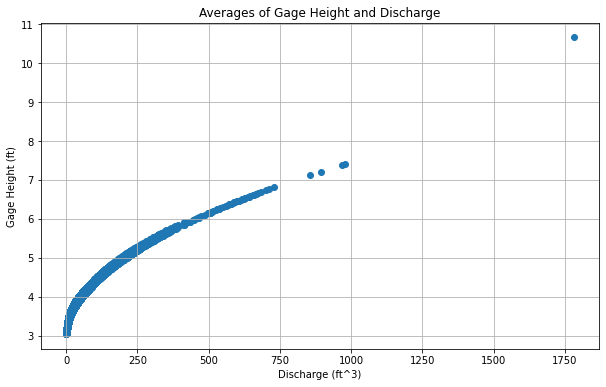

In [35]:
# Create scatter plot
plt.figure(figsize=[10,6])
plt.scatter(merged_df['Discharge'], merged_df['Gage Height'])

# Name the title and axes to describe the scatter plot
plt.title('Averages of Gage Height and Discharge')
plt.xlabel('Discharge (ft^3)')
plt.ylabel('Gage Height (ft)')

plt.grid(True)
plt.show()

This plot emphasizes the positive relationship between discharge and gage height. This means as discharge increases, the gage height increases.

### Explanation

From the Malletts Creek Gage Heights data, I wanted to explore how the gage height changes in relation to creek discharge. Since creek discharge is the amount of water movidng down a stream or river, I was curious to see if it had any affect on gage height. I figured moving water could somehow relate to the height of the creek.

To determine this relationship, I first had to make some changes to the Malletts Creek's discharge data table. I needed to merge these tables, but some changes were required before. Similar to the gage height data, I changed the 'Date Time' column to a datetime type, and I created a 'Month' and 'Year' for easier manipulation. I did this so the data would be easier to merge with the gage height data. I filtered out the poorer quality data because I wanted to ensure the data was useful, accurate information. I did this by filtering out the records with qualification codes 'P' or 'A:e'.

To quickly view the data before comparing it to gage height, I made a histogram and scatter plot to see general distributions of the data. I logged the y-scale of the histogram so it was readable, and it showed that most of the data consisted of records of discharge in the 0-250 cubic feet range. Besides this range, there is a good portion of data that lied in the 250-500 and 500-750 range. There was an outlier, but this seemed realistic as there was an outlier in the gage heights data too. The scatter plot showed that most of the data consisted of discharge around 10 cubic feet. This seemed realistic since the data was divided in 15 minute increments. 

Next, I created a line plot of both the average discharge per month and per year. These visualizations differed a bit from the gage height data, but I saw the same spike in the third month, March. This would match the previous exploration's seasonality. This is the start of sping when the ice and snow start to melt and there is periodic rain. Therefore, I felt that the relationship between gage height and discharge must be related. 

Now, I merged the gage height and the discharge data frames toegther to finish the data exploration. The tables had similar column values, so I created an inner merge to drop the records that were missing a discharge or gage height value. With the discharges and gage heights together, I grouped and aggregated the the get the monthly averages for gage height and discharge. I put these values onto a scatter plot and saw a somewhat positive trend. The scatter plot only had 12 points, so I also created a scatter plot to include all records in the merged data frame. This showed a strong poisitive trend. Therefore, it is plausibe that as discharge increases, gage height increases. In other words, the greater the volume of water moving down the creek, the larger/higher the gage height will be at Malletts Creek.